# Midterm Project

## Titanic Data Set - Machine Learning Module 03

Nathan Sloss 11/7/2023

This project will explore using a classification model on a dataset using a classification model.  The following process will be followed.<br>

Load and explore a dataset.<br>
Analyze feature distributions and consider feature selection.<br>
Train and evaluate a classification model.<br>
Compare different classification approaches.<br>
Document your work in a structured Jupyter Notebook.<br>
Conduct a peer review of a classmate’s project.<br>

### Titanic Data Set includes the following:<br>

Variable	Definition	Key<br>
survival	Survival	0 = No, 1 = Yes<br>
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<br>
sex	Sex	<br>
Age	Age in years	<br>
sibsp	# of siblings / spouses aboard the Titanic	<br>
parch	# of parents / children aboard the Titanic	<br>
ticket	Ticket number	<br>
fare	Passenger fare	<br>
cabin	Cabin number	<br>
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Section 1  Import and Inspect the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
train_df = pd.read_csv("data/train.csv", sep=',')
train_df.head()
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df= pd.read_csv("data/test.csv", sep=',')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Reflections
Test data set does not include the target of Survived.<br>

Training set and test set are missing data in "Age" , "Cabin" , "Embarked", and "Fare"<br>

Solution: Add missing age value with median age. <br>



## Section 2 Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean data

In [6]:
# Add missing Age value with median age

median_age = train_df['Age'].median()
train_df['Age'] = train_df['Age'].fillna(median_age)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
median_age_test=test_df['Age'].median()
test_df['Age']=test_df['Age'].fillna(median_age_test)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Reflections

You can see age is filled in.  We will not be using the Cabin number  as a feature as there is too much missing information. <br>

We will create a new dataframe that contains the information that will be used in our model in both Train_df and Test_df

In [8]:
good_train_df = train_df[["Survived","Pclass", "Age", "SibSp","Parch","Fare"]]

print(good_train_df)

     Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3  28.0      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]


In [9]:
#Create a correlation report of new dataframe

print(good_train_df.corr(numeric_only=True))

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


## Reflections
According to the Correlation Report Pclass and Fare have the highest coorelation to survivorship.  These will be our features to build our model. 

### 2.2 Feature Engineering

We will create a new feature called "Aggregate" that will sum Pclass, SibSp, Parch, Age x .01 and Fare x.01<br>

We will also create another feature called "Agg_squared"  which will square the Aggregate number for more normalization

In [10]:
# Create an aggregate column



good_train_df['Aggregate'] = good_train_df['Pclass'] + good_train_df['SibSp'] + good_train_df['Parch'] + good_train_df['Age'] * .01 + good_train_df['Fare'] * .01

good_train_df['Agg_squared'] = good_train_df['Aggregate'] ** 3
good_train_df.head()


C:\Users\nsloss\AppData\Local\Temp\ipykernel_9028\414362334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_train_df['Aggregate'] = good_train_df['Pclass'] + good_train_df['SibSp'] + good_train_df['Parch'] + good_train_df['Age'] * .01 + good_train_df['Fare'] * .01
C:\Users\nsloss\AppData\Local\Temp\ipykernel_9028\414362334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_train_df['Agg_squared'] = good_train_df['Aggregate'] ** 3


,Survived,Pclass,Age,SibSp,Parch,Fare,Aggregate,Agg_squared
0,0,3,22.0,1,0,7.2500,4.292500,79.091700
1,1,1,38.0,1,0,71.2833,3.092833,29.584853
2,1,3,26.0,0,0,7.9250,3.339250,37.234610
3,1,1,35.0,1,0,53.1000,2.881000,23.912764
4,0,3,35.0,0,0,8.0500,3.430500,40.371257


## Section 3 Feature Selection and Justification

### 3.1 Choose Features and target 

We will compare the results of 4 cases :
Case 1.<br>
Feature: Pclass <br>
Target: Survived<br>

Case 2.<br>
Feature: Fare<br>
Target: Survived<br>

Case 3. <br>
Feature: Aggregate<br>
Target: Survived<br>

Case 4.<br>
Feature: Agg_squared<br>
Target: Survived

### 3.2 Define X features and Y target

In [11]:
# Case 1: Feature = Pclass

# Select the feature 'Pclass' as input
X1 = good_train_df[['Pclass']]

# Select 'survived' as the target for the same rows
y1 = good_train_df['Survived']

In [12]:
# Case 2: Feature = Fare (drop if na or not available)

# Select the feature 'Fare', but drop rows where Fare is missing
X2 = good_train_df[['Fare']].dropna()

# Select the matching 'survived' values using the same index
y2 = good_train_df.loc[X2.index, 'Survived']

In [13]:
# Case 3: Feature = Aggregate (drop if na or not available)

# Select the feature 'Aggregate', but drop rows where age is missing
X3 = good_train_df[['Aggregate']].dropna()

# Select the matching 'survived' values using the same index
y3 = good_train_df.loc[X3.index, 'Survived']

In [14]:
# Case 4: Feature = Agg_squared (drop if na or not available)

# Select the feature 'Agg_squared', but drop rows where age is missing
X4 = good_train_df[['Agg_squared']].dropna()

# Select the matching 'survived' values using the same index
y4 = good_train_df.loc[X4.index, 'Survived']

## Section 4  Train a Classification Model (Decision Tree)


### 4.1 Split the Data


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
# Case 1: Feature = Pclass
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Pclass:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

Case 1 - Pclass:
Train size: 712 | Test size: 179


In [17]:
# Case 2: Feature = Fare
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Fare:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Fare:
Train size: 712 | Test size: 179


In [18]:
# Case 3: Features = Aggregate
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Aggregate:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Aggregate:
Train size: 712 | Test size: 179


In [19]:
# Case 4: Features = Agg_squared
splitter4 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx4, test_idx4 in splitter4.split(X4, y4):
    X4_train = X4.iloc[train_idx4]
    X4_test  = X4.iloc[test_idx4]
    y4_train = y4.iloc[train_idx4]
    y4_test  = y4.iloc[test_idx4]

print('Case 4 - Agg_squared:')
print('Train size:', len(X4_train), '| Test size:', len(X4_test))

Case 4 - Agg_squared:
Train size: 712 | Test size: 179


### 4.2 Create and Train a Model (Decision Tree)

In [20]:
# CASE 1: Decision Tree using Pclass
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
# CASE 2: Decision Tree using Fare
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
# CASE 3: Decision Tree using Aggregate
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
# CASE 3: Decision Tree using Agg_squared
tree_model4 = DecisionTreeClassifier()
tree_model4.fit(X4_train, y4_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [24]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - Pclass):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - Pclass):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - Pclass):
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       439
           1       0.62      0.37      0.46       273

    accuracy                           0.67       712
   macro avg       0.66      0.62      0.61       712
weighted avg       0.66      0.67      0.65       712

Results for Decision Tree on test data (Case 1 - Pclass):
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       110
           1       0.65      0.51      0.57        69

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.70       179



In [25]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - Fare):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - Fare):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - Fare):
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       439
           1       0.90      0.59      0.71       273

    accuracy                           0.82       712
   macro avg       0.84      0.77      0.79       712
weighted avg       0.83      0.82      0.81       712

Results for Decision Tree on test data (Case 2 - Fare):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.58      0.48      0.52        69

    accuracy                           0.66       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.66      0.66      0.66       179



In [26]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - Aggregate):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - Aggregate):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - Aggregate):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       439
           1       0.99      0.88      0.93       273

    accuracy                           0.95       712
   macro avg       0.96      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712

Results for Decision Tree on test data (Case 3 - Aggregate):
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       110
           1       0.35      0.30      0.33        69

    accuracy                           0.51       179
   macro avg       0.47      0.47      0.47       179
weighted avg       0.50      0.51      0.51       179



In [27]:
# Predict on training data
y4_pred = tree_model4.predict(X4_train)
print("Results for Decision Tree on training data (Case 4 - Agg_squared):")
print(classification_report(y4_train, y4_pred))

# Predict on test data
y4_test_pred = tree_model4.predict(X4_test)
print("Results for Decision Tree on test data (Case 4 - Agg_squared):")
print(classification_report(y4_test, y4_test_pred))

Results for Decision Tree on training data (Case 4 - Agg_squared):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       439
           1       0.99      0.88      0.93       273

    accuracy                           0.95       712
   macro avg       0.96      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712

Results for Decision Tree on test data (Case 4 - Agg_squared):
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       110
           1       0.35      0.30      0.33        69

    accuracy                           0.51       179
   macro avg       0.47      0.47      0.47       179
weighted avg       0.50      0.51      0.51       179



### Reflections on Decision Tree

The Aggregate did really well on the Training set however the Test Set produced the worst results of all three features.<br>

Pclass produced the worst results with the Training set but the best results with the test set.  

### 4.4 Report Confusion Matrix as Heatmap

Further exploration with the confusion matrix

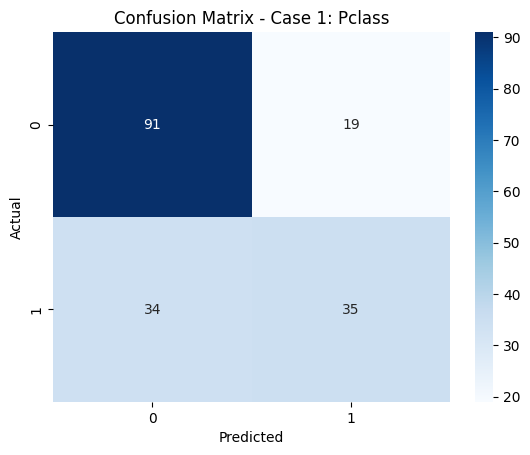

In [28]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Pclass')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Notes

Case 1 - Pclass Decision Tree model predicted 91 of 110 non-survivors correctly and 35 of 69 survivors correctly

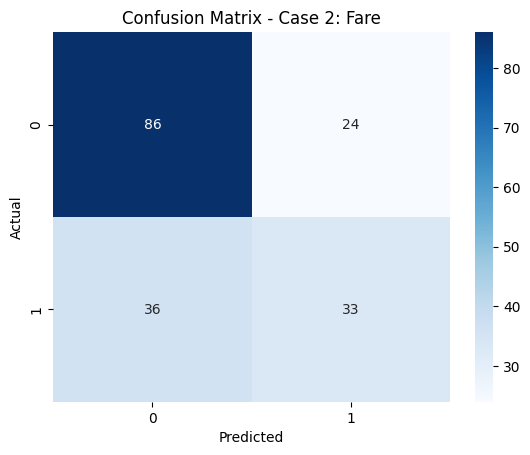

In [29]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Fare')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflections

Case 2 - Fare Decision Tree Model predicted 86 of 110 non survivors correctly and 33 of 69 survivors correctly 

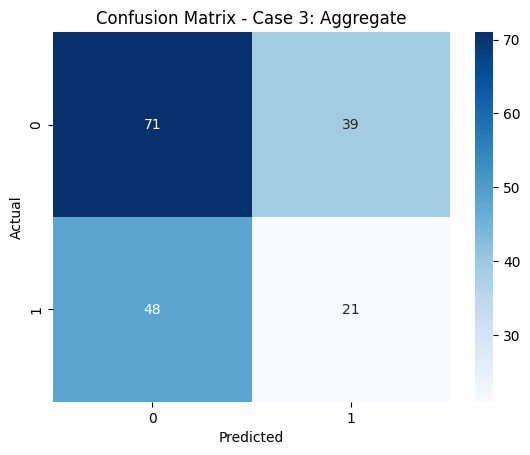

In [30]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Aggregate')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflections

Case 3- Aggregate Decision Tree model predicted 71 of 110 non - survivors correctly and 21 of 69 survivors correctly 

Case 4 - Squaring or cubing the data for "Agg_squared" did not improve model efficiency.   

## Section 5 Compare Alternative Models (Support Vector C , Neural Network)

### 5.1 Train and Evaluate the Model -- SVC

In [31]:
from sklearn.svm import SVC

# CASE 1: SVC using 'Pclass'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - Pclass):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - Pclass):
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       110
           1       0.65      0.51      0.57        69

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.70       179



In [32]:
# CASE 2: SVC using 'Fare'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       110
           1       0.68      0.41      0.51        69

    accuracy                           0.70       179
   macro avg       0.69      0.64      0.65       179
weighted avg       0.70      0.70      0.68       179



In [33]:
# CASE 3: SVC using 'Aggregate'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age + family size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age + family size):
              precision    recall  f1-score   support

           0       0.63      0.91      0.75       110
           1       0.52      0.16      0.24        69

    accuracy                           0.62       179
   macro avg       0.58      0.53      0.50       179
weighted avg       0.59      0.62      0.55       179



### Reflections

SVC Did not do any better than Decision Tree.  Both suggest that Pclass is the best feature to use from all 4 cases. 

### 5.2  Train and Evaluate -- Neural Network Model 

In [34]:
# Train NN for Case 1 (Pclass)
nn_model1 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model1.fit(X1_train, y1_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [35]:
# Predict on test data (Case 1 Pclass)
y1_nn_pred = nn_model1.predict(X1_test)

# Print classification report
print("Results for Neural Network on test data (Pclass):")
print(classification_report(y1_test, y1_nn_pred))

Results for Neural Network on test data (Pclass):
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       110
           1       0.65      0.51      0.57        69

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.70       179



In [36]:
# Train NN for Case 2 (Fare)
nn_model2 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model2.fit(X2_train, y2_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [37]:
# Predict on test data (Case 3)
y2_nn_pred = nn_model2.predict(X2_test)

# Print classification report
print("Results for Neural Network on test data (Fare):")
print(classification_report(y2_test, y2_nn_pred))

Results for Neural Network on test data (Fare):
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       110
           1       0.62      0.42      0.50        69

    accuracy                           0.68       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.67      0.68      0.66       179



In [38]:
# Train NN for Case 3 (Aggregate)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

c:\Repos\applied-ml-nates\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [39]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Aggregate):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Aggregate):
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       110
           1       0.38      0.22      0.28        69

    accuracy                           0.56       179
   macro avg       0.49      0.50      0.48       179
weighted avg       0.52      0.56      0.53       179



### Reflections

The Neural Network also shows that "Pclass" was the best feauture to use.  

## 6. Conclusion

Comparison of all 3 features : Pclass, Fare, and Aggregate (Agg_squared was not supported for further inquiry), show that Pclass produced the best results in 3 different models Decision Tree, SVC , Neural Network. <br>


Comparing the results of the models for the feature "Pclass" <br>

Decision Tree     <br>
        precision    recall  f1-score   support<br>

           0       0.73      0.83      0.77       110
           1       0.65      0.51      0.57        69

SVC <br>
        precision    recall  f1-score   support

           0       0.73      0.83      0.77       110
           1       0.65      0.51      0.57        69

Neural Network<br>
        precision    recall  f1-score   support

           0       0.73      0.83      0.77       110
           1       0.65      0.51      0.57        69



### NOTE -

 All 3 models produced the same results for the same feature